In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import funcs
import coral
import star
import mcd
import dann
import base
import plots
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score
from torch.optim.lr_scheduler import StepLR

/cm/shared/apps/ml-pythondeps-py39-cuda11.8-gcc11/4.12.0/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#%% Data loading for captured waveform
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file_paths = '/home/ash.ali/ic3/testbed_da/data/'
numpy_files = [f for f in os.listdir(file_paths) if f.endswith('.npy')]
classes = []
X_path = []
Y_path = []

# Load numpy and create label
for idx, f in enumerate(numpy_files):
    mod = f.split('.')[0]
    classes.append(mod)
    path = os.path.join(file_paths, f)
    
    data = np.load(path)
    X_path.append(data)
    
    Y_path.extend([idx] * data.shape[0])

X_path = np.vstack(X_path)
Y_path = np.array(Y_path)

S_train_loader, S_val_loader = funcs.create_loader(X_path, Y_path, permute=False)

In [3]:
#%% Data loading for captured waveform

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file_paths = '/home/ash.ali/ic3/testbed_da/data/'
numpy_files = [f for f in os.listdir(file_paths) if f.endswith('.npy')]
classes = []
X_path = []
Y_path = []

# Load numpy and create label
for idx, f in enumerate(numpy_files):
    mod = f.split('.')[0]
    classes.append(mod)
    path = os.path.join(file_paths, f)
    
    data = np.load(path)
    X_path.append(data)
    
    Y_path.extend([idx] * data.shape[0])

X_path = np.vstack(X_path)
Y_path = np.array(Y_path)

S_train_loader, S_val_loader = funcs.create_loader(X_path, Y_path, permute=False)

/cm/shared/apps/pytorch-py39-cuda11.8-gcc11/1.13.0/lib/python3.9/site-packages/torch/backends/cudnn/__init__.py:91: UserWarning: PyTorch was compiled without cuDNN/MIOpen support. To use cuDNN/MIOpen, rebuild PyTorch making sure the library is visible to the build system.
  warnings.warn(



Run 1/5
Epoch 1/25, Train Loss: 0.7796, Train Acc: 0.6099, Val Loss: 0.8268, Val Acc: 0.5987


/cm/shared/apps/pytorch-py39-cuda11.8-gcc11/1.13.0/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 2/25, Train Loss: 0.4329, Train Acc: 0.7691, Val Loss: 0.3234, Val Acc: 0.8025
Epoch 3/25, Train Loss: 0.3329, Train Acc: 0.8213, Val Loss: 0.2666, Val Acc: 0.7966
Epoch 4/25, Train Loss: 0.3295, Train Acc: 0.8272, Val Loss: 0.3601, Val Acc: 0.7823
Epoch 5/25, Train Loss: 0.2937, Train Acc: 0.8511, Val Loss: 0.2599, Val Acc: 0.8214
Epoch 6/25, Train Loss: 0.2943, Train Acc: 0.8564, Val Loss: 0.6313, Val Acc: 0.8220
Epoch 7/25, Train Loss: 0.2793, Train Acc: 0.8869, Val Loss: 0.0838, Val Acc: 0.9821
Epoch 8/25, Train Loss: 0.3187, Train Acc: 0.8838, Val Loss: 0.1186, Val Acc: 0.9703
Epoch 9/25, Train Loss: 0.2669, Train Acc: 0.9080, Val Loss: 0.3432, Val Acc: 0.8375
Epoch 10/25, Train Loss: 0.3175, Train Acc: 0.8933, Val Loss: 0.0795, Val Acc: 0.9841
Epoch 11/25, Train Loss: 0.2833, Train Acc: 0.8781, Val Loss: 0.2874, Val Acc: 0.8295
Epoch 12/25, Train Loss: 0.2098, Train Acc: 0.8934, Val Loss: 0.8208, Val Acc: 0.8204
Epoch 13/25, Train Loss: 0.2945, Train Acc: 0.8872, Val Loss: 

/cm/shared/apps/ml-pythondeps-py39-cuda11.8-gcc11/4.12.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


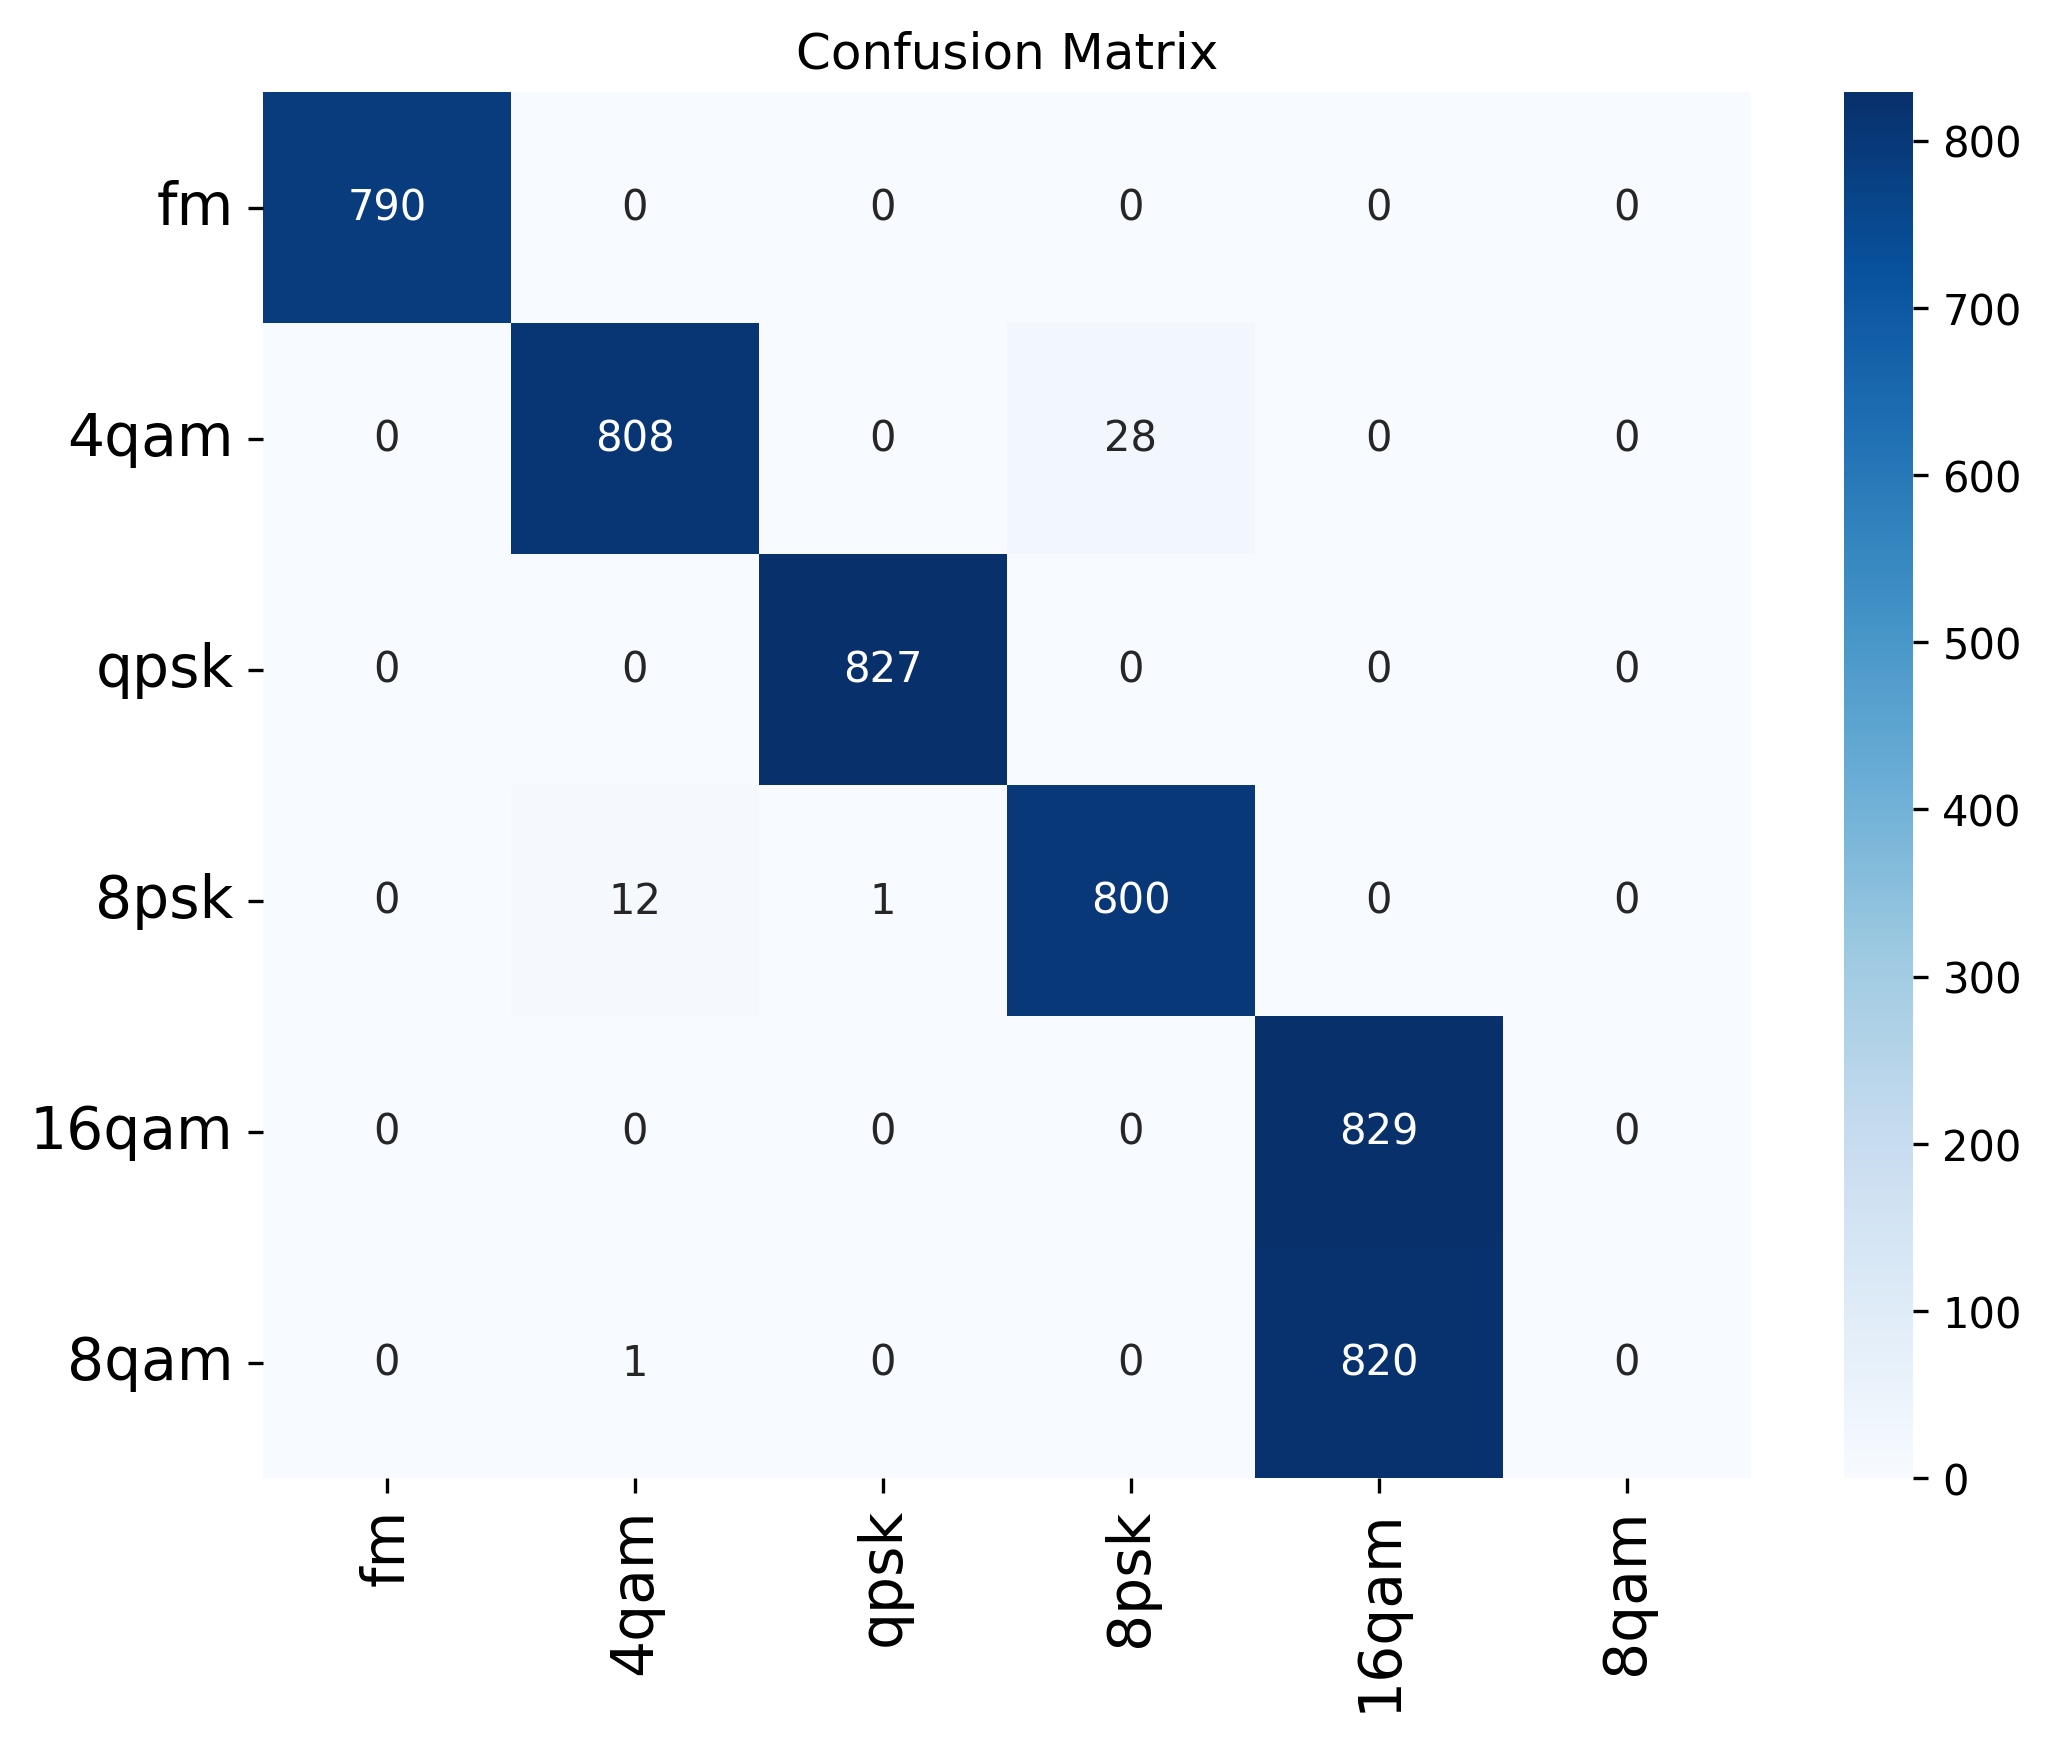


Run 2/5


/cm/shared/apps/pytorch-py39-cuda11.8-gcc11/1.13.0/lib/python3.9/site-packages/torch/backends/cudnn/__init__.py:91: UserWarning: PyTorch was compiled without cuDNN/MIOpen support. To use cuDNN/MIOpen, rebuild PyTorch making sure the library is visible to the build system.
  warnings.warn(


Epoch 1/25, Train Loss: 0.7814, Train Acc: 0.5950, Val Loss: 0.3802, Val Acc: 0.7710
Epoch 2/25, Train Loss: 0.3963, Train Acc: 0.7808, Val Loss: 0.3304, Val Acc: 0.7996
Epoch 3/25, Train Loss: 0.3315, Train Acc: 0.8122, Val Loss: 0.3216, Val Acc: 0.8183
Epoch 4/25, Train Loss: 0.2852, Train Acc: 0.8497, Val Loss: 0.1931, Val Acc: 0.8779
Epoch 5/25, Train Loss: 0.3420, Train Acc: 0.8633, Val Loss: 0.9390, Val Acc: 0.7710
Epoch 6/25, Train Loss: 0.2452, Train Acc: 0.8950, Val Loss: 0.1190, Val Acc: 0.9829
Epoch 7/25, Train Loss: 0.3156, Train Acc: 0.8678, Val Loss: 0.1761, Val Acc: 0.9500
Epoch 8/25, Train Loss: 0.2594, Train Acc: 0.8694, Val Loss: 0.2193, Val Acc: 0.7984
Epoch 9/25, Train Loss: 0.3093, Train Acc: 0.8641, Val Loss: 0.1484, Val Acc: 0.9852
Epoch 10/25, Train Loss: 0.3003, Train Acc: 0.8858, Val Loss: 0.0928, Val Acc: 0.9829
Epoch 11/25, Train Loss: 0.2664, Train Acc: 0.9222, Val Loss: 0.0636, Val Acc: 0.9835
Epoch 12/25, Train Loss: 0.3153, Train Acc: 0.8953, Val Loss: 0

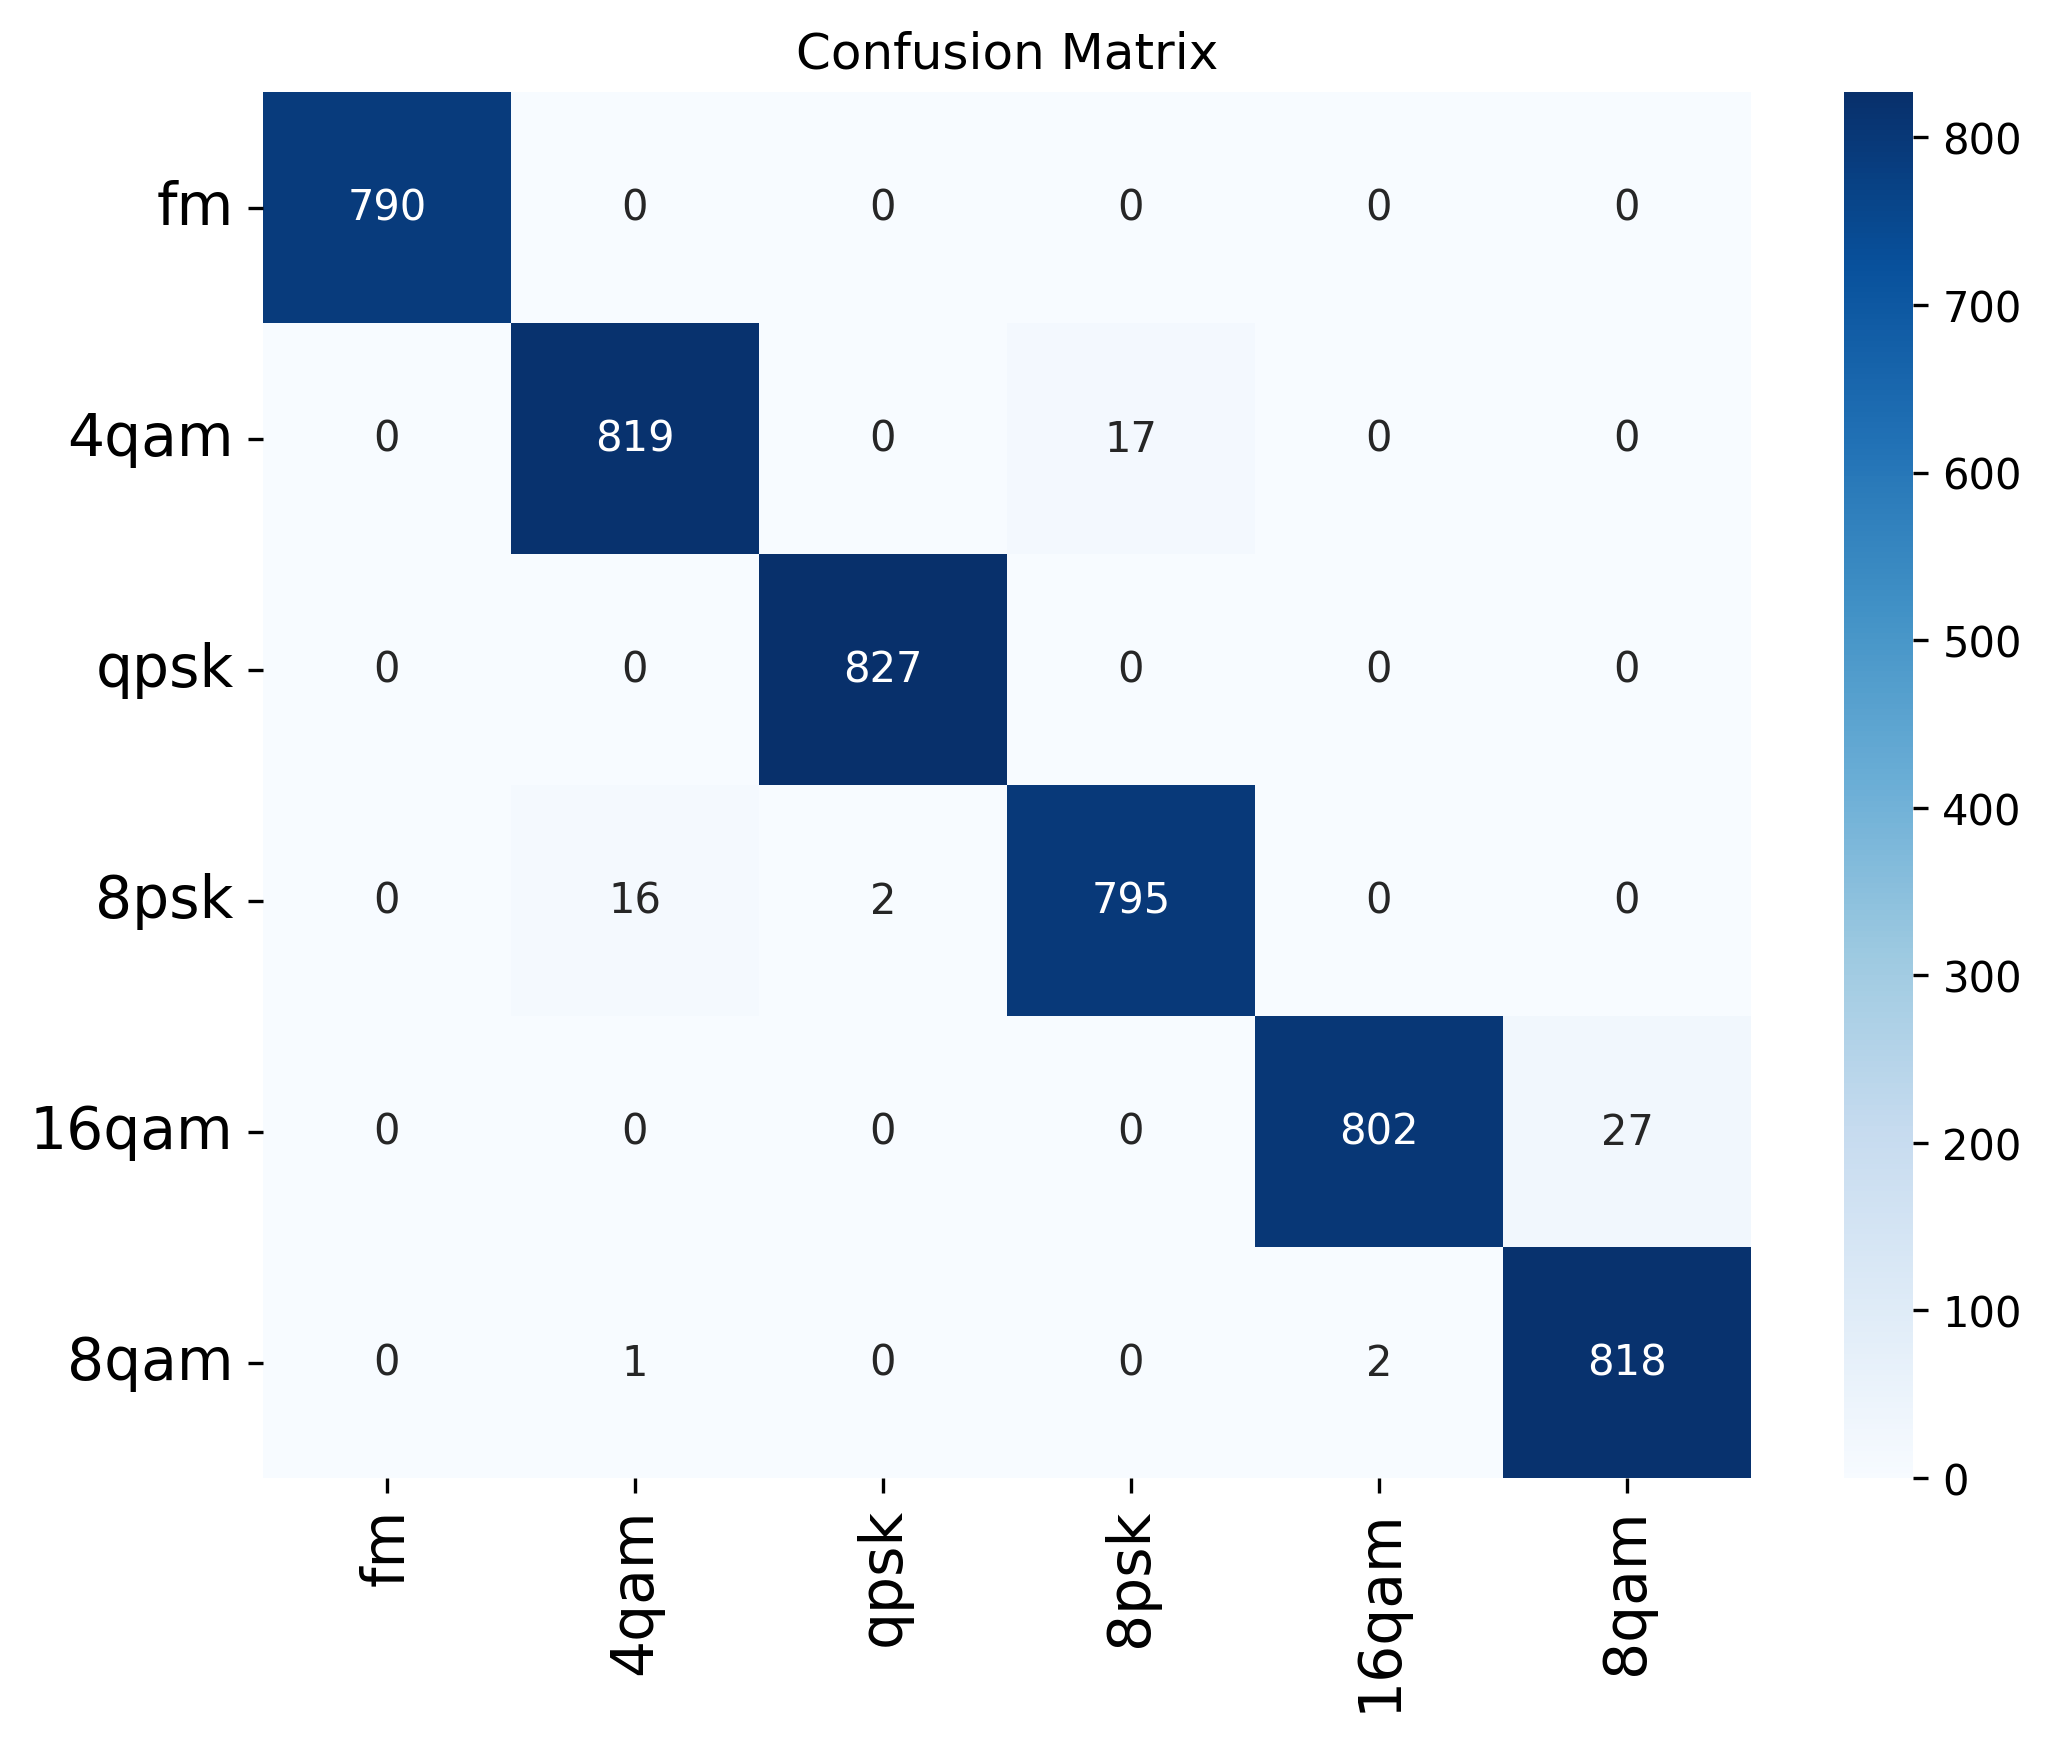


Run 3/5


/cm/shared/apps/pytorch-py39-cuda11.8-gcc11/1.13.0/lib/python3.9/site-packages/torch/backends/cudnn/__init__.py:91: UserWarning: PyTorch was compiled without cuDNN/MIOpen support. To use cuDNN/MIOpen, rebuild PyTorch making sure the library is visible to the build system.
  warnings.warn(


Epoch 1/25, Train Loss: 0.8229, Train Acc: 0.5758, Val Loss: 0.6167, Val Acc: 0.6404
Epoch 2/25, Train Loss: 0.3742, Train Acc: 0.8023, Val Loss: 0.3818, Val Acc: 0.7569
Epoch 3/25, Train Loss: 0.3519, Train Acc: 0.8127, Val Loss: 0.2728, Val Acc: 0.9685
Epoch 4/25, Train Loss: 0.3422, Train Acc: 0.8342, Val Loss: 0.3777, Val Acc: 0.8061
Epoch 5/25, Train Loss: 0.2865, Train Acc: 0.8747, Val Loss: 0.4279, Val Acc: 0.8118
Epoch 6/25, Train Loss: 0.3851, Train Acc: 0.8598, Val Loss: 0.5014, Val Acc: 0.8169
Epoch 7/25, Train Loss: 0.3723, Train Acc: 0.8452, Val Loss: 0.5200, Val Acc: 0.8139
Epoch 8/25, Train Loss: 0.2895, Train Acc: 0.8781, Val Loss: 0.3598, Val Acc: 0.8220
Early stopping!


/cm/shared/apps/ml-pythondeps-py39-cuda11.8-gcc11/4.12.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


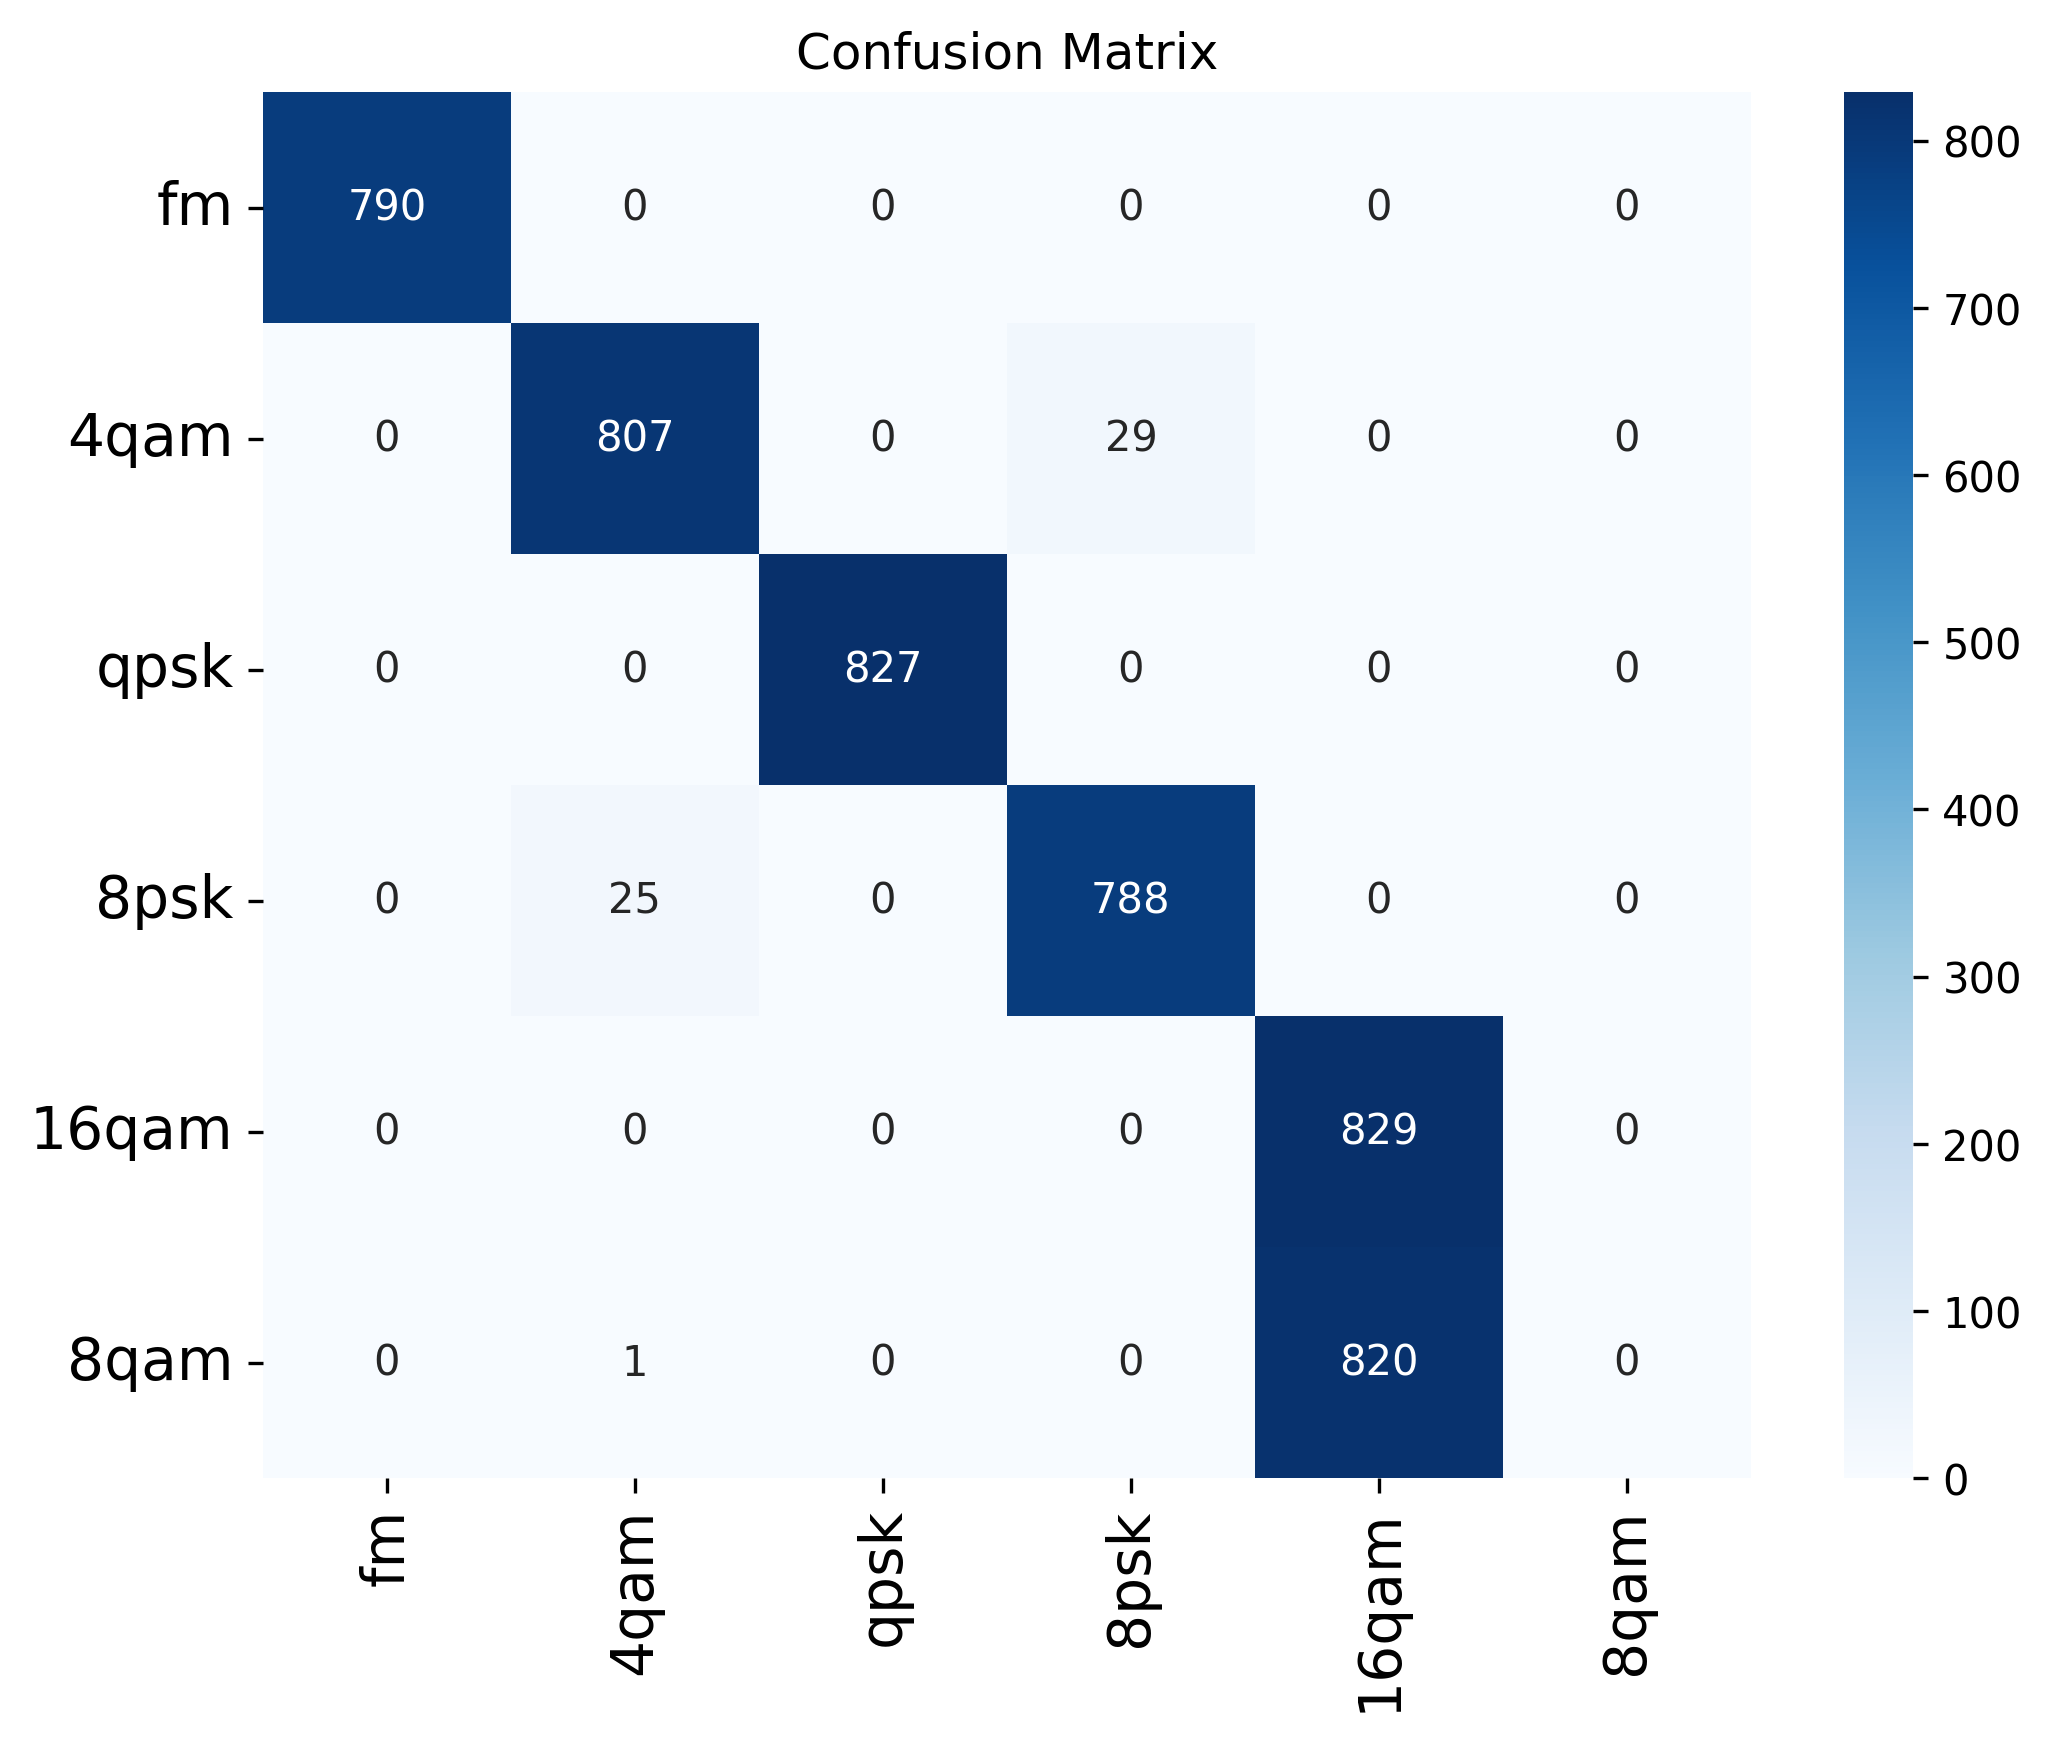


Run 4/5


/cm/shared/apps/pytorch-py39-cuda11.8-gcc11/1.13.0/lib/python3.9/site-packages/torch/backends/cudnn/__init__.py:91: UserWarning: PyTorch was compiled without cuDNN/MIOpen support. To use cuDNN/MIOpen, rebuild PyTorch making sure the library is visible to the build system.
  warnings.warn(


Epoch 1/25, Train Loss: 0.6893, Train Acc: 0.6648, Val Loss: 0.3789, Val Acc: 0.7537
Epoch 2/25, Train Loss: 0.3824, Train Acc: 0.7908, Val Loss: 0.2919, Val Acc: 0.8029
Epoch 3/25, Train Loss: 0.3157, Train Acc: 0.8241, Val Loss: 0.3158, Val Acc: 0.9394
Epoch 4/25, Train Loss: 0.3122, Train Acc: 0.8284, Val Loss: 0.5589, Val Acc: 0.7850
Epoch 5/25, Train Loss: 0.2963, Train Acc: 0.8433, Val Loss: 0.3164, Val Acc: 0.8255
Epoch 6/25, Train Loss: 0.2892, Train Acc: 0.8642, Val Loss: 0.2104, Val Acc: 0.8255
Epoch 7/25, Train Loss: 0.3534, Train Acc: 0.8631, Val Loss: 0.1887, Val Acc: 0.8236
Epoch 8/25, Train Loss: 0.3268, Train Acc: 0.8786, Val Loss: 0.7242, Val Acc: 0.8275
Epoch 9/25, Train Loss: 0.2796, Train Acc: 0.9035, Val Loss: 0.1002, Val Acc: 0.9860
Epoch 10/25, Train Loss: 0.1847, Train Acc: 0.9044, Val Loss: 0.0935, Val Acc: 0.9886


In [ ]:
#%% Baseline - VTC24 code

# Hyperparameters
lr = 0.001
n_epochs = 25
n_runs = 5
n_classes = len(classes)

model = base.CLDNN().to(device) # Model selection
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=10, gamma=.1)

# Initialize lists to store performance metrics for each run
accuracy_s_list, pr_s_list, re_s_list, f1_s_list = [], [], [], []
accuracy_t_list, pr_t_list, re_t_list, f1_t_list = [], [], [], []
class_accuracies_s = np.zeros((n_runs, len(classes)))
class_accuracies_t = np.zeros((n_runs, len(classes)))

def train_model():
    best_val_loss = float('inf')
    patience = 5
    trigger_times = 0
    for epoch in range(n_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in S_train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(S_train_loader.dataset)
        train_accuracy = correct / total

        # Validation
        model.eval()
        val_running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in S_val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_loss = val_running_loss / len(S_val_loader.dataset)
        val_accuracy = correct / total

        print(f'Epoch {epoch+1}/{n_epochs}, '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

        scheduler.step()

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print('Early stopping!')
                break

    return model

def eva_model(model, loader, num_classes):
    # Evaluate model
    model.eval()
    true_labels = []
    predictions = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            class_outputs = model(inputs)
            _, preds = torch.max(class_outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            predictions.extend(preds.cpu().numpy())

    # Performance metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='macro')
    recall = recall_score(true_labels, predictions, average='macro')
    f1 = f1_score(true_labels, predictions, average='macro')
    
    # Confusion matrix and per-class accuracy
    conf_mat = confusion_matrix(true_labels, predictions)
    class_accuracy = conf_mat.diagonal() / conf_mat.sum(axis=1)

    # Plot the confusion matrix
    plt.figure(figsize=(8,6),dpi=300)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.yticks(fontsize=14,rotation=360)
    plt.xticks(fontsize=14,rotation=90)
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, precision, recall, f1, class_accuracy

for run in range(n_runs):
    print(f'\nRun {run+1}/{n_runs}')
    # Model is reset per run. Change model type here too.
    model = base.CLDNN().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    trained_model = train_model()

    # Evaluate on source domain
    accuracy_s, pr_s, re_s, f1_s, class_acc_s = eva_model(trained_model, S_val_loader, n_classes)
    accuracy_s_list.append(accuracy_s)
    pr_s_list.append(pr_s)
    re_s_list.append(re_s)
    f1_s_list.append(f1_s)
    class_accuracies_s[run] = class_acc_s
    
    # Evaluate on target domain
    #accuracy_t, pr_t, re_t, f1_t, class_acc_t = eva_model(trained_model, T_val_loader, n_classes)
    #accuracy_t_list.append(accuracy_t)
    #pr_t_list.append(pr_t)
    #re_t_list.append(re_t)
    #f1_t_list.append(f1_t)
    #class_accuracies_t[run] = class_acc_t

# Calculate mean and standard deviation of performance metrics
mean_accuracy_s = np.mean(accuracy_s_list)
mean_pr_s = np.mean(pr_s_list)
mean_re_s = np.mean(re_s_list)
mean_f1_s = np.mean(f1_s_list)

#mean_accuracy_t = np.mean(accuracy_t_list)
#mean_pr_t = np.mean(pr_t_list)
#mean_re_t = np.mean(re_t_list)
#mean_f1_t = np.mean(f1_t_list)

mean_class_accuracies_s = np.mean(class_accuracies_s, axis=0)
#mean_class_accuracies_t = np.mean(class_accuracies_t, axis=0)

print(f"\nSource performance: {mean_accuracy_s*100:.2f} {mean_pr_s*100:.2f} {mean_re_s*100:.2f} {mean_f1_s*100:.2f}")
#print(f"Target performance: {mean_accuracy_t*100:.2f} {mean_pr_t*100:.2f} {mean_re_t*100:.2f} {mean_f1_t*100:.2f}\n")

#for i, class_name in enumerate(class_subset):
#    print(f"{class_name}: {mean_class_accuracies_t[i]*100:.2f}")